In [1]:
%reset

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, multilabel_confusion_matrix, mean_squared_error


In [3]:
ventas = pd.read_table('data/Global Superstore.txt')

In [4]:
ventas.columns = [x.lower() for x in ventas.columns]
ventas.columns = [x.replace(' ','_') for x in ventas.columns]
ventas.rename(columns={'sub-category': 'sub_category'}, inplace=True)
ventas.drop(columns = ['记录数','order_id','row_id','customer_id','product_id','market','region'], inplace = True)
#ventas.drop(columns = ['记录数','order_id','row_id','customer_id','product_id','market','category','market2','state','region','customer_name'], inplace = True)

In [5]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        51290 non-null  object 
 1   city            51290 non-null  object 
 2   country         51290 non-null  object 
 3   customer_name   51290 non-null  object 
 4   discount        51290 non-null  float64
 5   order_date      51290 non-null  object 
 6   order_priority  51290 non-null  object 
 7   product_name    51290 non-null  object 
 8   profit          51290 non-null  float64
 9   quantity        51290 non-null  int64  
 10  sales           51290 non-null  int64  
 11  segment         51290 non-null  object 
 12  ship_date       51290 non-null  object 
 13  ship_mode       51290 non-null  object 
 14  shipping_cost   51290 non-null  float64
 15  state           51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  year            51290 non-null 

In [6]:
cat = [x for x in ventas.columns if (ventas[x].dtype == 'object') & (x !='order_priority')]
cat

['category',
 'city',
 'country',
 'customer_name',
 'order_date',
 'product_name',
 'segment',
 'ship_date',
 'ship_mode',
 'state',
 'sub_category',
 'market2']

In [7]:
encoder = OneHotEncoder(sparse_output=False)
dummies = encoder.fit_transform(ventas[cat])
dum = pd.DataFrame(dummies, columns = encoder.get_feature_names_out(cat))
dum

,category_Furniture,category_Office Supplies,category_Technology,city_Aachen,city_Aalen,city_Aalst,city_Aba,city_Abadan,city_Abakaliki,city_Abbeville,...,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables,market2_APAC,market2_Africa,market2_EMEA,market2_EU,market2_LATAM,market2_North America
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51286,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51287,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
ventas2 = pd.merge(dum, ventas.drop(columns = cat), left_index=True, right_index=True, how = 'outer')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(ventas2.drop(columns = ['order_priority']), ventas2['order_priority'], test_size=0.3, random_state=1011)

In [10]:
tree = DecisionTreeClassifier(max_depth=2,random_state= 1011)

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1011)

In [11]:
importances = pd.DataFrame(data = [tree.feature_importances_] ,columns = tree.feature_names_in_)
importances.sort_values(by = 0, axis = 1, ascending= False).T
#he tenido suerte y las 3 mas importantes suman 1


,0
ship_mode_Standard Class,0.843346
ship_mode_Second Class,0.085467
shipping_cost,0.071187
"product_name_Logitech Flash Drive, Erganomic",0.000000
"product_name_Logitech Flash Drive, Programmable",0.000000
...,...
customer_name_Janet Lee,0.000000
customer_name_Janet Martin,0.000000
customer_name_Janet Molinari,0.000000
customer_name_Jas O'Carroll,0.000000


In [12]:
ventas2 = ventas2[['ship_mode_Standard Class', 'ship_mode_Second Class', 'shipping_cost', 'order_priority']]

ventas2

,ship_mode_Standard Class,ship_mode_Second Class,shipping_cost,order_priority
0,0.0,1.0,4.37,High
1,1.0,0.0,0.94,Medium
2,1.0,0.0,1.81,Medium
3,1.0,0.0,4.59,Medium
4,1.0,0.0,1.32,High
...,...,...,...,...
51285,0.0,0.0,5.15,High
51286,0.0,0.0,0.44,High
51287,0.0,0.0,0.31,Medium
51288,0.0,0.0,15.95,Critical


In [13]:
X_train, X_test, y_train, y_test = train_test_split(ventas2.drop(columns = ['order_priority']), 
                                ventas2['order_priority'], test_size=0.3, random_state=1011)

In [28]:
y_train.value_counts(normalize=True)

order_priority
Medium      0.574687
High        0.302092
Critical    0.075704
Low         0.047517
Name: proportion, dtype: float64

In [29]:
y_test.value_counts(normalize = True)

order_priority
Medium      0.571911
High        0.302528
Critical    0.078898
Low         0.046663
Name: proportion, dtype: float64

In [14]:
#hiperparametros

random = RandomForestClassifier(random_state=1011)
param_grid = {
    'max_depth': range(2,5),
    'n_estimators' : [100,200,300,400,500],
}

random_search = RandomizedSearchCV(estimator=random, 
                                   param_distributions=param_grid, 
                                   n_iter=100,
                                   cv=5,
                                   random_state=1011, 
                                   scoring= 'accuracy',
                                   n_jobs=-1)

In [15]:
random_search.fit(X_train,y_train)

c:\Users\helen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1011),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(2, 5),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1011, scoring='accuracy')

In [16]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 4}

In [17]:
rfc = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=1011)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=1011)

In [18]:
preds_train = rfc.predict(X_train)

In [19]:
as_train = accuracy_score(preds_train, y_train)*100
ps_train = precision_score(preds_train, y_train, average='weighted')*100
print(as_train,ps_train)

61.39876890510543 74.86311617669244


In [20]:
preds_test = rfc.predict(X_test)

In [21]:
#pintamos el arbol del test

export_graphviz(
        rfc.estimators_[0],
        feature_names = (ventas2.drop(columns = ['order_priority']).columns),
        out_file=str('C:/Users/helen/OneDrive/Documentos/GitHub/Machine learning project/output/order_priority_tree.dot'),
        rounded=True,
        filled=True
    )

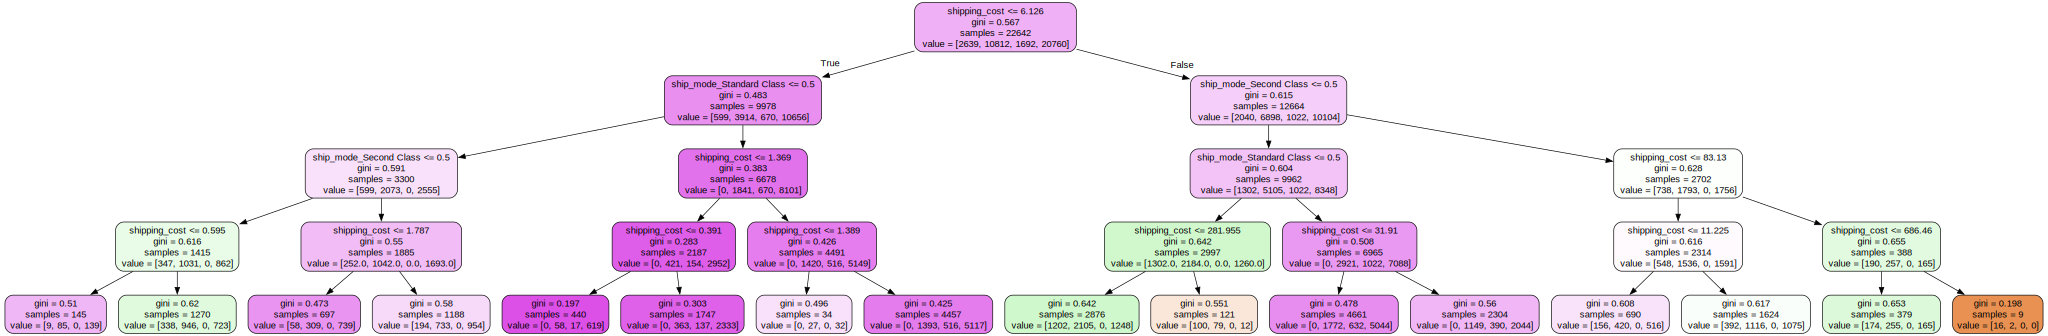

In [22]:
from graphviz import Source

Source.from_file(str('C:/Users/helen/OneDrive/Documentos/GitHub/Machine learning project/output/order_priority_tree.dot'))


In [23]:
as_test = accuracy_score(preds_test, y_test)
ps_test = precision_score(preds_test, y_test, average='weighted')
print(as_test,ps_test)

0.6055761356989666 0.736449103706348


In [24]:
y_test.value_counts(normalize = True)

order_priority
Medium      0.571911
High        0.302528
Critical    0.078898
Low         0.046663
Name: proportion, dtype: float64

In [25]:
label_mapping = {0: 'Critical',1:'High',2:'Low',3:'Medium'}

In [26]:

mlbl_cm = multilabel_confusion_matrix(preds_test,y_test)
for i, matrix in enumerate(mlbl_cm):
    label_name = label_mapping[i]
    print(f"Matriz de Confusión para la Etiqueta {label_name}:\n{matrix}")

Matriz de Confusión para la Etiqueta Critical:
[[14151  1198]
 [   22    16]]
Matriz de Confusión para la Etiqueta High:
[[8577 2949]
 [2155 1706]]
Matriz de Confusión para la Etiqueta Low:
[[14669   718]
 [    0     0]]
Matriz de Confusión para la Etiqueta Medium:
[[2695 1204]
 [3892 7596]]


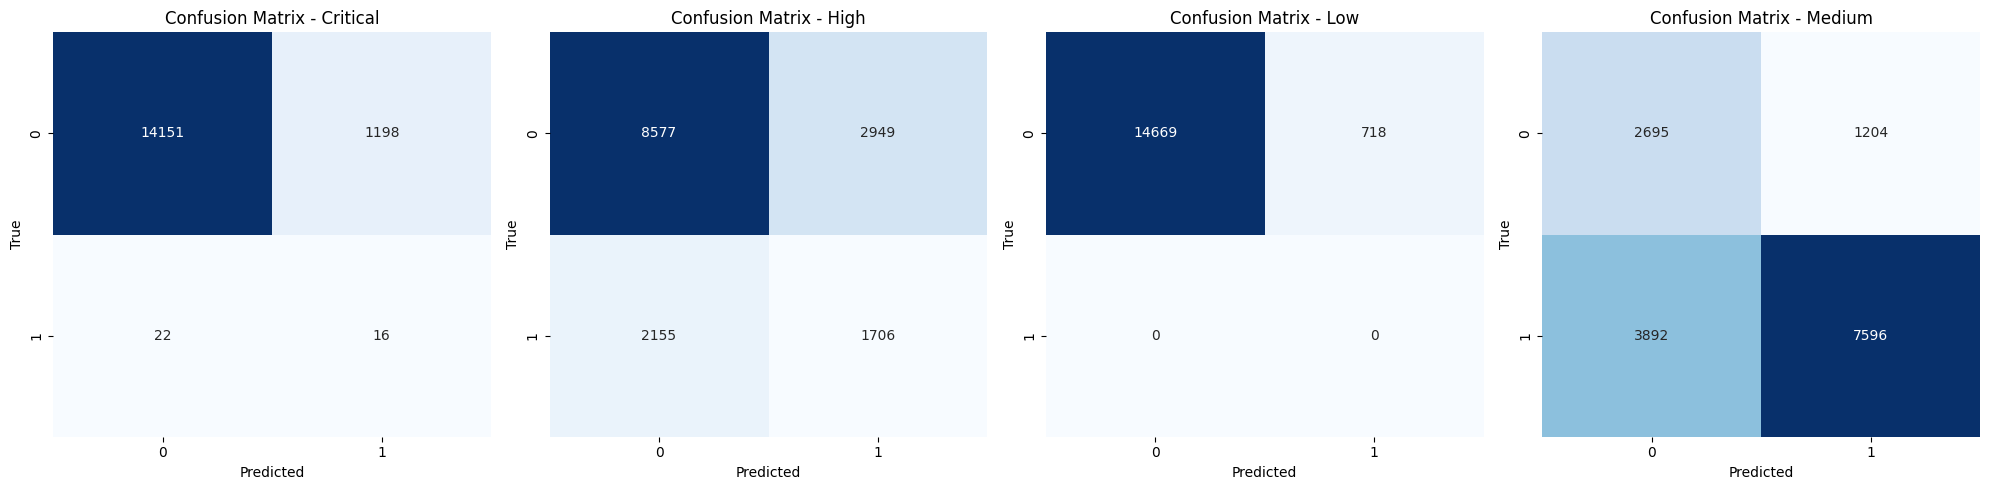

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

ig, axes = plt.subplots(nrows=1, ncols=mlbl_cm.shape[0], figsize=(20, 5))

for i, matrix in enumerate(mlbl_cm):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    label_name = label_mapping[i]
    axes[i].set_title(f'Confusion Matrix - {label_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()